In [102]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import c_
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

sns.reset_orig()

NOISE = 16
SAMPLES = 2425
SEED = 244825
CLASSES = 2
TRAIN_SPLIT = 0.8
TEST_SPLIT = 0.2
REPEATS = 100

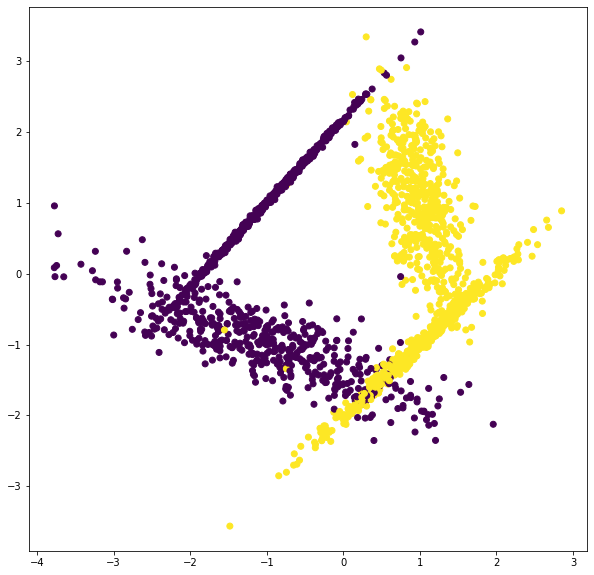

In [103]:
X, y = datasets.make_classification(n_features=2, random_state=SEED, n_redundant=0, n_samples=SAMPLES, n_classes=2, n_clusters_per_class=2,
                                    class_sep=1, n_repeated=0)

# X = X[:, [0, 1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT, test_size=TEST_SPLIT,
                                                    random_state=SEED)

xx, yy = np.meshgrid(np.arange(X.min(), X.max(), 0.01),
                     np.arange(X.min(), X.max(), 0.01))

plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [3]:
# X, y = datasets.make_moons(random_state=SEED, n_samples=SAMPLES, noise=0.05)
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT, test_size=TEST_SPLIT,
#                                                     random_state=SEED, shuffle=True, stratify=y)
#
# xx, yy = np.meshgrid(np.arange(X.min(), X.max(), 0.01),
#                      np.arange(X.min(), X.max(), 0.01))
#
# y_test2 = np.copy(y_test)
#
# y_train2[y_train2 == 0] = -1
#
# plt.figure(figsize=(10, 10))
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

#         self.weights_input_to_hidden = np.array([
#             [0.1, 0.1, -.3], [.1, .2, 0.0], [.0, .7, .1], [.2, .4, .0], [-.3, .5, .1]
#         ])

In [4]:
from abc import ABC, abstractmethod


class AbstractActivationFunction(ABC):
    @abstractmethod
    def __init__(self, name, function, derivative):
        raise NotImplementedError

    @abstractmethod
    def __str__(self):
        raise NotImplementedError

    @abstractmethod
    def __call__(self, x, derivative=False):
        raise NotImplementedError

In [135]:
from sklearn.preprocessing import OneHotEncoder


class MyNeuralNetwork:

    class ActivationFunction(AbstractActivationFunction):
        def __init__(self, name, function, derivative):
            self.name = name
            self.function = function
            self.derivative = derivative

        def __str__(self):
            return self.name

        def __call__(self, x, derivative=False):
            if derivative:
                return self.derivative(x)
            else:
                return self.function(x)

    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.01, activation_function: AbstractActivationFunction=None, random_state=None, epochs=100):
        self.n_inputs = n_inputs + 1
        self.hidden_layer_size = n_hidden
        self.n_outputs = n_outputs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.epochs = epochs

        if activation_function:
            self.activation_function = activation_function
        else:
            self.activation_function = self.ActivationFunction(name="sigmoid",
                                                               function=lambda x: 1 / (1 + np.exp(-x)),
                                                               derivative=lambda x: 1 / (1 + np.exp(-x) * (1 - 1 / (1 + np.exp(-x)))
                                                                )
                                                                )
            # self.activation_function = self.ActivationFunction(name="relu",
            #                                                    function=lambda x: np.maximum(0, x),
            #                                                    derivative=lambda x: np.where(x > 0, 1, 0))

        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_layer_size ** -0.5,
                                                        (self.hidden_layer_size, self.n_inputs))

        # self.weights_input_to_hidden = np.array([
        #     [0.1, 0.1, -.3], [.1, .2, 0.0], [.0, .7, .1], [.2, .4, .0], [-.3, .5, .1]
        # ])

        self.weights_hidden_to_output = np.random.normal(0.0, self.n_outputs ** -0.5,
                                                         (self.n_outputs, self.hidden_layer_size))

        # self.weights_hidden_to_output = np.array([
        #     [0.7, 0.9, -0.4, 0.8, 0.1],
        #     [0.8, 0.5, 0.3, 0.1, 0.0],
        #     [-0.3, 0.9, 0.3, 0.1, -0.2]
        # ])

        #print(self.weights_input_to_hidden)
        #print(self.weights_hidden_to_output)

    def fit(self, X, y):
        X = np.array(X)
        bias = np.ones((X.shape[0], 1)) * -1
        X = np.column_stack((X, bias))

        batch = m - m % self.batchsize
        for e in tqdm(range(self.epochs)):
            indexes = np.arange(0, len(X), 1)
            np.random.shuffle(indexes)
            X_trimmed = X_with_bias[indexes][:batch]
            y_trimmed = y[indexes][:batch]

        for i in range(0, batch, self.batchsize):
            X_batch = X_trimmed[i:i + self.batchsize]
            y_batch = y_trimmed[i:i + self.batchsize]

            X_batch = X_batch.T
            output_layer_output, hidden_layer_output = self.forward_pass(X_batch)
            #print(hidden_layer_output, '\n', output_layer_output)
            output_layer_delta, hidden_layer_delta = self.backward_pass(X_batch, y_batch, output_layer_output, hidden_layer_output)
            # print(output_layer_delta, '\n', hidden_layer_delta)
            self.update_weights(hidden_layer_delta, output_layer_delta)
            #print(self.weights_input_to_hidden, '\n', self.weights_hidden_to_output)
        pass

    def forward_pass(self, X):
        hidden_layer_input = np.dot(self.weights_input_to_hidden, X)
        hidden_layer_output = self.activation_function(hidden_layer_input)

        output_layer_input = np.dot(self.weights_hidden_to_output, hidden_layer_output)
        output_layer_output = self.activation_function(output_layer_input)

        return output_layer_output, hidden_layer_output

    def backward_pass(self, X, y, output_layer_output, hidden_layer_output):
        # error_output_layer = 2 * (1 / 3) * (y_output - y1) / 4
        # output layer error
        output_layer_error = 2 * (output_layer_output - y) / y.size
        output_layer_delta = output_layer_error @ hidden_layer_output.T
        # hidden layer error
        #mnn.weights_hidden_to_output.T @ error_output_layer
        hidden_layer_error = self.weights_hidden_to_output.T @ output_layer_error
        hidden_layer_delta = hidden_layer_error * self.activation_function(hidden_layer_output, derivative=True) @ X.T

        return output_layer_delta, hidden_layer_delta

    def update_weights(self, delta_at_hidden_layer, delta_at_output_layer):
        # update weights between hidden and output layer
        self.weights_hidden_to_output -= (self.learning_rate * delta_at_output_layer)


        # print(self.weights_hidden_to_output)
        # update weights between input and hidden layer
        self.weights_input_to_hidden -= (self.learning_rate * delta_at_hidden_layer)

    def predict(self, X):
        X = np.array(X)
        bias = np.ones((X.shape[0], 1)) * -1
        X = np.column_stack((X, bias))
        X = X.T
        outy, outh = self.forward_pass(X)
        return np.where(outy >= 0.5, 1, 0)

    def predict_proba(self, X):
        X = np.array(X)
        bias = np.ones((X.shape[0], 1)) * -1
        X = np.column_stack((X, bias))
        X = X.T
        outy, outh = self.forward_pass(X)
        return outy

    def score(self, X, y):
        pass


In [6]:
from sklearn.preprocessing import OneHotEncoder


class MyNeuralNetwork2:
    class ActivationFunction(AbstractActivationFunction):
        def __init__(self, name, function, derivative):
            self.name = name
            self.function = function
            self.derivative = derivative

        def __str__(self):
            return self.name

        def __call__(self, x, derivative=False):
            if derivative:
                return self.derivative(x)
            else:
                return self.function(x)

    def __init__(self, n_inputs, n_hidden: tuple, n_outputs, learning_rate=0.01,
                 activation_function: AbstractActivationFunction = None, random_state=None, epochs=100,
                    batch_size=1):
        self.n_inputs = n_inputs + 1
        self.hidden_layer_size = n_hidden
        self.n_outputs = n_outputs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.epochs = epochs
        self.batch_size = batch_size

        if activation_function:
            self.activation_function = activation_function
        else:
            self.activation_function = self.ActivationFunction(name="sigmoid",
                                                               function=lambda x: 1 / (1 + np.exp(-x)),
                                                               derivative=lambda x: 1 / (
                                                                           1 + np.exp(-x) * (1 - 1 / (1 + np.exp(-x)))
                                                                           )
                                                               )
        self.layers = []
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_layer_size[0] ** -0.5,
                                                        (self.hidden_layer_size[0], self.n_inputs))

        self.layers.append(self.weights_input_to_hidden)

        for idx, size in enumerate(self.hidden_layer_size):
            if idx == 0:
                continue
            self.layers.append(np.random.normal(0.0, size ** -0.5,
                                                (size, self.hidden_layer_size[idx - 1])))

        self.weights_hidden_to_output = np.random.normal(0.0, self.n_outputs ** -0.5,
                                                         (self.n_outputs, self.hidden_layer_size[-1]))

        self.layers.append(self.weights_hidden_to_output)
        # for l in self.layers:
        #     print(l)

    def fit(self, X, y):
        X = np.array(X)
        bias = np.ones((X.shape[0], 1)) * 1
        X = np.column_stack((X, bias))

        m = len(X)
        batch = m - m % self.batch_size
        for e in tqdm(range(self.epochs)):
            indexes = np.arange(0, len(X), 1)
            np.random.shuffle(indexes)
            X_trimmed = X[indexes][:batch]
            y_trimmed = y[indexes][:batch]

            for i in range(0, batch, self.batch_size):
                X_batch = X_trimmed[i:i + self.batch_size]
                y_batch = y_trimmed[i:i + self.batch_size]

                layers_outputs = self.forward_pass(X_batch.T)

                layers_deltas = self.backward_pass(X_batch.T, y_batch, layers_outputs)

                self.update_weights(layers_deltas)

    def forward_pass(self, X):
        outputs = []
        current_inp = X
        for l in self.layers:
            outputs.append(
                self.activation_function(
                    l @ current_inp
                )
            )
            current_inp = outputs[-1]

        # print('--------')
        # print(outputs)

        return outputs

    def backward_pass(self, X, y, layers_outputs):
        deltas = []
        errors = []

        # error_output_layer = 2 * (1 / 3) * (y_output - y1) / 4
        # output layer error
        output_layer_error = (layers_outputs[-1] - y)
        out_layer_delta = output_layer_error @ layers_outputs[-2].T

        errors.append(output_layer_error)
        deltas.append(out_layer_delta)

        # print(":", len(layers_outputs) - 1)
        for idx in range(len(layers_outputs) - 2, 0, -1):
            # print(idx)
            current_layer_error = self.layers[idx + 1].T @ errors[-1]
            current_layer_delta = current_layer_error * self.activation_function(layers_outputs[idx], derivative=True) @ layers_outputs[idx - 1].T

            errors.append(current_layer_error)
            deltas.append(current_layer_delta)
            pass
        #print(len(deltas))
        # for e in errors:
        #     print(e.shape)
        # print(666, self.layers[1].T.shape, errors[-1].shape)
        last_layer_error = self.layers[1].T @ errors[-1]
        # print(last_layer_error.shape, X.T.shape)
        # print(777, self.layers[1].T.shape, errors[-1].shape)
        last_layer_delta = last_layer_error * self.activation_function(layers_outputs[0], derivative=True) @ X.T

        errors.append(last_layer_error)
        deltas.append(last_layer_delta)

        # errors = np.array(errors)
        # deltas = np.array(deltas)

        #print(deltas)
        # hidden layer error
        #mnn.weights_hidden_to_output.T @ error_output_layer
        # hidden_layer_error = self.layers[-1].T @ output_layer_error
        # hidden_layer_delta = hidden_layer_error * self.activation_function(layers_outputs[-2], derivative=True) @ X.T
        deltas.reverse()
        return deltas

    def update_weights(self, layers_deltas):
        # for i in range(len(layers_deltas)):
        #     print(layers_deltas[i].shape, self.layers[i].shape)

        for idx, ld in enumerate(layers_deltas):
            # print(layers_deltas[idx].shape, self.layers[idx].shape)
            self.layers[idx] -= (self.learning_rate * ld)

        # # update weights between hidden and output layer
        # self.weights_hidden_to_output -= (self.learning_rate * delta_at_output_layer)
        #
        # # print(self.weights_hidden_to_output)
        # # update weights between input and hidden layer
        # self.weights_input_to_hidden -= (self.learning_rate * delta_at_hidden_layer)

    def predict(self, X):
        X = np.array(X)
        bias = np.ones((X.shape[0], 1)) * 1
        X = np.column_stack((X, bias))
        X = X.T
        layers_output = self.forward_pass(X)
        return np.where(layers_output[-1] >= 0.5, 1, 0)

    def predict_proba(self, X):
        X = np.array(X)
        bias = np.ones((X.shape[0], 1)) * -1
        X = np.column_stack((X, bias))
        X = X.T
        outy, outh = self.forward_pass(X)
        return outy

    def score(self, X, y):
        pass




In [7]:
class Relu:
    def __call__(self, x, derivative=False):
            if derivative:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

relu = Relu()

In [8]:
mnn = MyNeuralNetwork(3, 5, 1)

In [9]:
ith = mnn.weights_input_to_hidden
x1 = np.array([[0.5, 0.1, .2, .8], [.75, .3, .1, .9], [.1, .7, .6, .2]])
y1 = np.array([[.1, .5, .1, .7], [1.0, .2, .3, .6], [.1, -.5, .2, .2]])
zzz = np.array(ith @ x1)
lay_out = relu(zzz)
print(zzz)
lay_out

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [ ]:
y_output = mnn.weights_hidden_to_output @ lay_out
y_output

In [ ]:
error_output_layer = 2 * (1 / 3) * (y_output - y1) / 4
print(y1)
error_output_layer

In [ ]:
# h_delta = mnn.weights_input_to_hidden @ lay_out
# h_delta

In [ ]:
out_delta = error_output_layer @ lay_out.T
out_delta

In [ ]:
mnn.weights_hidden_to_output - (0.1 * out_delta)

In [ ]:
print(mnn.weights_hidden_to_output.T, '\n', error_output_layer)
hid_err = mnn.weights_hidden_to_output.T @ error_output_layer
# hid_delt = hid_err @ x1.T
hid_err

In [ ]:
# print(mnn.weights_input_to_hidden, '\n', hid_delt)
# (mnn.weights_input_to_hidden - (0.1 * hid_delt))

In [ ]:
mnn.fit(x1, y1)

In [15]:
mnn = MyNeuralNetwork2(3, (10,), 1)
mnn.fit(X_train.T, y_train)

  0%|          | 0/100 [00:00<?, ?it/s]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1941 is different from 4)

In [ ]:
y_pred = mnn.predict(X_test)
y_pred

In [42]:
def tree_function(mdl, X_tr, y_tr, X_te, y_te, xxx=None, yyy=None, silent=False):

    mdl.fit(X_tr, y_tr)

    y_pred = mdl.predict(X_te).flatten()
    # print(y_pred.shape, y_te.shape)

    if silent == False:
        mesh_data = c_[xxx.ravel(), yyy.ravel()]
        Z = np.asarray(mdl.predict(mesh_data)).reshape(xx.shape)

        plt.figure(figsize=(10, 10))
        plt.contourf(xx, yy, Z, alpha=0.6, cmap = 'ocean')
        plt.scatter(X_te[:, 0], X_te[:, 1], c=y_te)

        cm_model = confusion_matrix(y_te, y_pred)
        tn_model = cm_model[0][0]
        fn_model = cm_model[0][1]
        tp_model = cm_model[1][1]
        fp_model = cm_model[1][0]
        ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

        fpr, tpr, roc_auc = roc_curve(y_te, y_pred)

        rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
        rok_model.plot()


        print("Czulosc:", tp_model/(tp_model + fn_model))
        print("Swoistosc:", tn_model/(tn_model + fp_model))
        print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

        print("ROC auc:", roc_auc_score(y_test, y_pred))
        print("F1 score:", f1_score(y_test, y_pred))
        print("BA score:", balanced_accuracy_score(y_test, y_pred))

100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


Czulosc: 0.9635627530364372
Swoistosc: 0.9831932773109243
Accuracy: 0.9731958762886598
ROC auc: 0.9732170186715642
F1 score: 0.9734151329243353
BA score: 0.9732170186715641


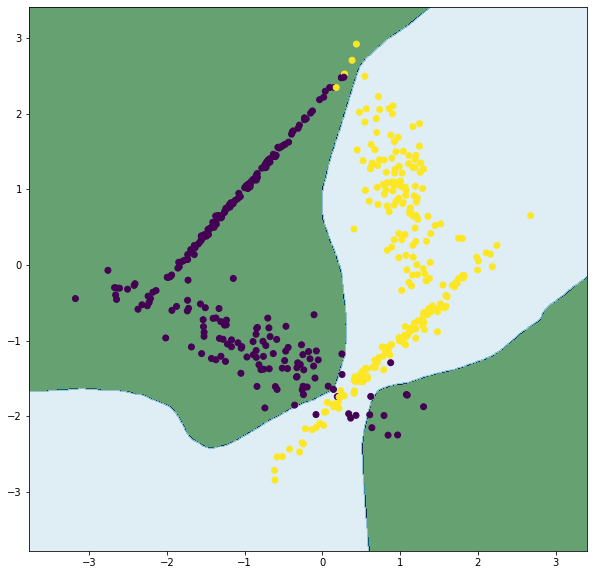

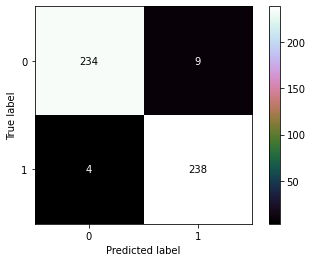

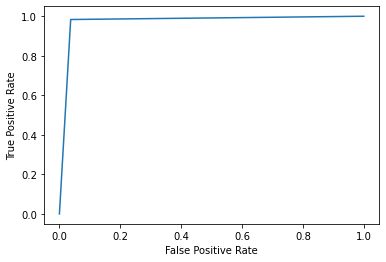

In [204]:

tree_function(MyNeuralNetwork2(2, (1024, 512, ), 1, learning_rate=0.0001, activation_function=relu, epochs=100, batch_size=254), X_train, y_train, X_test, y_test, xx, yy)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Jakub\AppData\Local\Temp\ipykernel_14032\1506818263.py:35: RuntimeWarning: overflow encountered in exp
  function=lambda x: 1 / (1 + np.exp(-x)),
100%|██████████| 1000/1000 [00:11<00:00, 88.85it/s]


Czulosc: 0.9031007751937985
Swoistosc: 0.960352422907489
Accuracy: 0.9298969072164949
ROC auc: 0.929964629459579
F1 score: 0.932
BA score: 0.9299646294595789


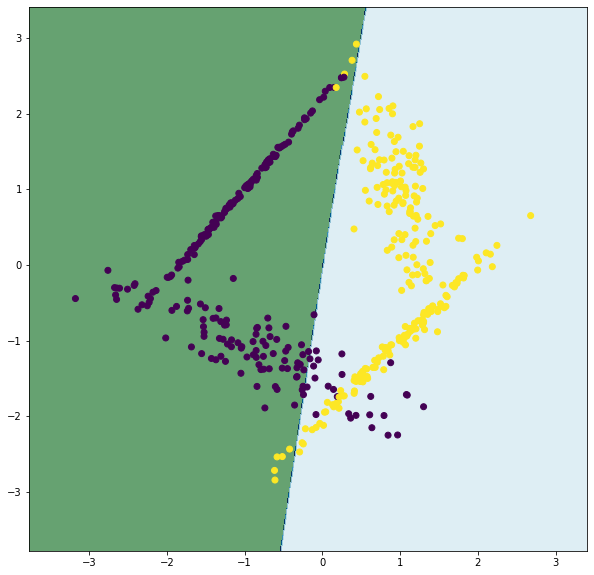

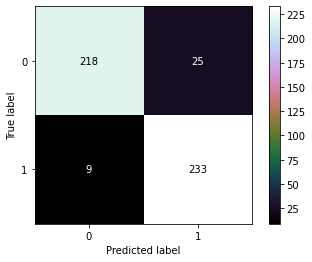

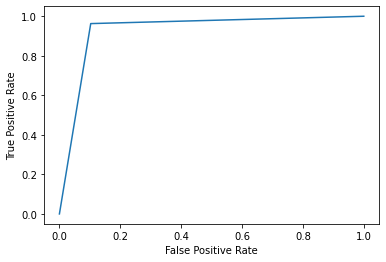

In [287]:

tree_function(MyNeuralNetwork2(2, (64, 32,), 1, learning_rate=0.01, activation_function=None, epochs=1000, batch_size=1000), X_train, y_train, X_test, y_test, xx, yy)

(2, 32)


C:\Users\Jakub\anaconda3\envs\PUM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Czulosc: 0.9246031746031746
Swoistosc: 0.9613733905579399
Accuracy: 0.9422680412371134
ROC auc: 0.9423103084719247
F1 score: 0.9433198380566802
BA score: 0.9423103084719247


0.01

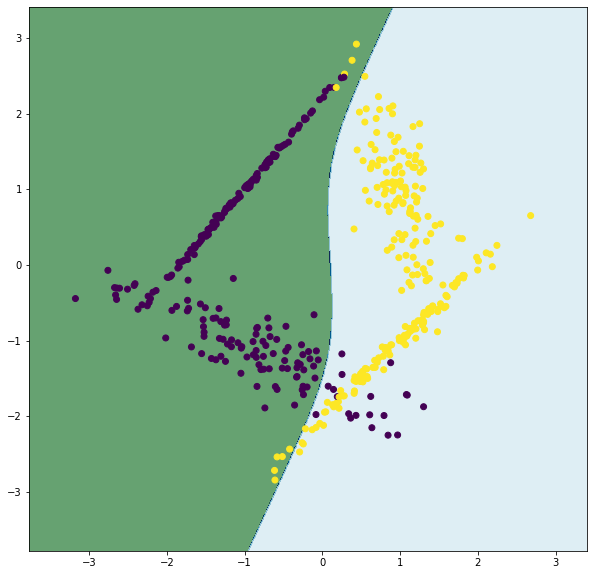

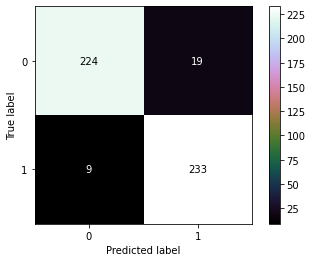

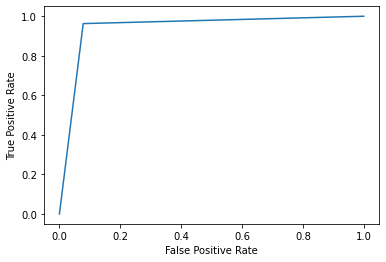

In [272]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', activation='logistic', max_iter=100, learning_rate_init=0.01 ,hidden_layer_sizes=(2, 32,))
print(clf.hidden_layer_sizes)
tree_function(clf, X_train, y_train, X_test, y_test, xx, yy)
clf.learning_rate_init

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', activation='relu', max_iter=1000, hidden_layer_sizes=(15, 5, 1,))
print(clf.hidden_layer_sizes)
tree_function(clf, X_train, y_train, X_test, y_test, xx, yy)
clf.learning_rate_init